In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1- Importing dataset
cancer= load_breast_cancer()
df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df["target"]=cancer.target

In [4]:
# 2- Choosing a KNN model
X= cancer.data
y= cancer.target

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

#Scaling
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [5]:
# 3- Model Training
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# 4- Evaluating the model
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9649122807017544


In [7]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[ 59   4]
 [  2 106]]


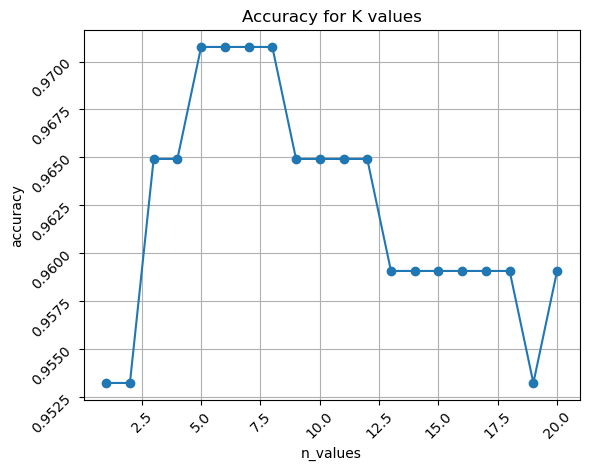

In [10]:
accuracy_values=[]
n_values=[]

for n in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)
    n_values.append(n)
    
plt.figure()
plt.plot(n_values,accuracy_values,marker="o",linestyle="-")
plt.title("Accuracy for K values")
plt.xlabel("n_values")
plt.xticks(rotation=45)
plt.ylabel("accuracy")
plt.yticks(rotation=45)
plt.grid(True)
plt.savefig("breast_cancer.png")
plt.show()